In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from Bayesian2 import BayesianLinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'float',
    'YearSeason': 'str',
    'LactationNumber': 'float',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float',
    'FarmHeatStressMilkProduction': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/BLRMilkFarmYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
# Update YearSeason to 'YYYY-S' format
milk_data['YearSeason'] = milk_data['Date'].dt.year.astype(str) + '-' + milk_data['Date'].dt.month.sub(1).floordiv(3).add(1).astype(str)

# Calculate the LactationStartDate
milk_data['LactationStartDate'] = milk_data.groupby(['SE_Number', 'LactationNumber'])['Date'].transform('min')

# Get the Age at the LactationStartDate
lactation_start_age = milk_data[milk_data['Date'] == milk_data['LactationStartDate']].set_index(['SE_Number', 'LactationNumber'])['Age']

# Merge the start age back into the original DataFrame
milk_data = milk_data.merge(lactation_start_age.rename('AgeAtLactationStart'), on=['SE_Number', 'LactationNumber'])

# Encode categorical data
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_breeds = pd.DataFrame(encoder.fit_transform(milk_data[['BreedName']]), columns=encoder.get_feature_names_out(['BreedName']))
milk_data = pd.concat([milk_data, encoded_breeds], axis=1)
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,LactationStartDate,AgeAtLactationStart,BreedName_02 SLB,BreedName_04 SJB,BreedName_06 RB,BreedName_27 Montbéliard,BreedName_41 Fjällko,BreedName_99 Korsning/Obest Ras,BreedName_99 Korsning/obestämbar ras,BreedName_Unknown Breed
0,2022-05-28,a624fb9a,SE-064c0cec-1189,3242,02 SLB,8.0,3.0,2022-2,15.22,0.0000,...,2022-05-28,3242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-05-29,a624fb9a,SE-064c0cec-1189,3243,02 SLB,8.0,4.0,2022-2,18.96,15.2200,...,2022-05-28,3242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-05-30,a624fb9a,SE-064c0cec-1189,3244,02 SLB,8.0,5.0,2022-2,22.64,17.0900,...,2022-05-28,3242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-05-31,a624fb9a,SE-064c0cec-1189,3245,02 SLB,8.0,6.0,2022-2,26.49,18.9400,...,2022-05-28,3242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-06-01,a624fb9a,SE-064c0cec-1189,3246,02 SLB,8.0,7.0,2022-2,33.61,20.8275,...,2022-05-28,3242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628671,2022-03-19,f454e660,SE-fcdf259d-0044-0,3709,41 Fjällko,9.0,274.0,2022-1,20.41,12.4860,...,2022-01-01,3632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
628672,2022-03-20,f454e660,SE-fcdf259d-0044-0,3710,41 Fjällko,9.0,275.0,2022-1,12.17,12.8140,...,2022-01-01,3632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
628673,2022-03-21,f454e660,SE-fcdf259d-0044-0,3711,41 Fjällko,9.0,276.0,2022-1,13.59,13.4100,...,2022-01-01,3632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
628674,2022-03-22,f454e660,SE-fcdf259d-0044-0,3712,41 Fjällko,9.0,277.0,2022-1,13.20,14.0560,...,2022-01-01,3632,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Farm a624fb9a

In [25]:
# Select the farm
farm = 'a624fb9a'
daily_farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm].copy()

# Ensure the feature 'MeanTemperature' is float type
daily_farm_data['MeanTemperature'] = daily_farm_data['MeanTemperature'].astype(float)

# Scale features
scaler = StandardScaler()
daily_farm_data[['MeanTemperature', 'Age']] = scaler.fit_transform(daily_farm_data[['MeanTemperature', 'Age']])

# Function to fit model and calculate yield change
def fit_model_and_calculate_yield_change(data, feature, additional_features):
    yield_changes = []
    grouped_data = data.groupby(['YearSeason', 'SE_Number'])
    
    for (year_season, cow), group in grouped_data:
        cow_data = group

        # Prepare features
        X = cow_data[[feature] + additional_features]
        y = cow_data['NormalizedDailyYield']

        # Calculate prior mean and variance
        cow_mean = y.mean()
        cow_variance = y.var() if y.var() > 1e-6 else 1e-6
        beta = 1 / cow_variance
        prior_mean_value = X.mean(axis=0)

        # Define priors
        prior_mean = np.append([cow_mean], prior_mean_value.values).reshape(-1, 1)
        prior_cov = np.eye(len(prior_mean)) * 0.01

        # Fit model
        model = BayesianLinearRegression(
            dataframe=cow_data,
            subject_name=cow,
            selected_features=[feature] + additional_features,
            target='NormalizedDailyYield',
            subject_type='cow',
            prior_mean=prior_mean,
            prior_cov=prior_cov,
            beta=beta
        )
        result = model.fit_model()

        # Store results
        yield_changes.append({
            'YearSeason': year_season,
            'SE_Number': cow,
            'Yield HeatStress': result['Off-set']['mu']
        })

    return pd.DataFrame(yield_changes)

# Define features
selected_feature = 'MeanTemperature'
additional_features = list(encoded_breeds.columns) + ['Age']

# Separate data for HeatStress=1 and HeatStress=0 conditions
data_heatstress_1 = daily_farm_data[daily_farm_data['HeatStress'] == 1]
data_heatstress_0 = daily_farm_data[daily_farm_data['HeatStress'] == 0]

# Fit models and calculate yield changes
yield_changes_heatstress_1 = fit_model_and_calculate_yield_change(data_heatstress_1, selected_feature, additional_features)
yield_changes_heatstress_0 = fit_model_and_calculate_yield_change(data_heatstress_0, selected_feature, additional_features)

# Merge results with breed data and calculate deviations
results_df = yield_changes_heatstress_1.merge(
    yield_changes_heatstress_0, on=['YearSeason', 'SE_Number'], suffixes=('=1', '=0')
)

# Merge age and breed data back to results_df using the AgeAtLactationStart column
# Ensure unique combinations of SE_Number and YearSeason in the daily_farm_data for merging
unique_age_breed_data = daily_farm_data[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName']].drop_duplicates(subset=['SE_Number', 'YearSeason'])

results_df = results_df.merge(
    unique_age_breed_data, on=['SE_Number', 'YearSeason'], how='left'
)

# Calculate the correct deviation from baseline
# baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean() + data_heatstress_1['FarmHeatStressMilkProduction'].mean()
baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean()
results_df['Deviation from Baseline HeatStress=1'] = results_df['Yield HeatStress=1'] - baseline_yield_change  # Corrected calculation

# Reorder columns to make SE_Number the first column
results_df = results_df[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName', 'Yield HeatStress=1', 'Yield HeatStress=0', 'Deviation from Baseline HeatStress=1']]
results_df

,SE_Number,YearSeason,AgeAtLactationStart,BreedName,Yield HeatStress=1,Yield HeatStress=0,Deviation from Baseline HeatStress=1
0,SE-064c0cec-1189,2022-1,3095,02 SLB,0.998405,1.054299,-0.002275
1,SE-30dc5787-1396,2022-1,2479,02 SLB,0.972854,0.989618,-0.027826
2,SE-30dc5787-1402,2022-1,2462,02 SLB,0.980539,0.796117,-0.020141
3,SE-a624fb9a-1039,2022-1,4126,02 SLB,0.990949,1.079332,-0.009731
4,SE-a624fb9a-1162,2022-1,2736,02 SLB,1.075439,0.959654,0.074759
...,...,...,...,...,...,...,...
692,SE-a624fb9a-1503,2024-3,735,01 SRB,1.026367,1.074771,0.025687
693,SE-a624fb9a-1508,2024-3,783,01 SRB,0.915465,1.176812,-0.085215
694,SE-a624fb9a-1510,2024-3,727,02 SLB,0.975220,1.032513,-0.025459
695,SE-a624fb9a-1511,2024-3,710,01 SRB,1.132139,1.218650,0.131460


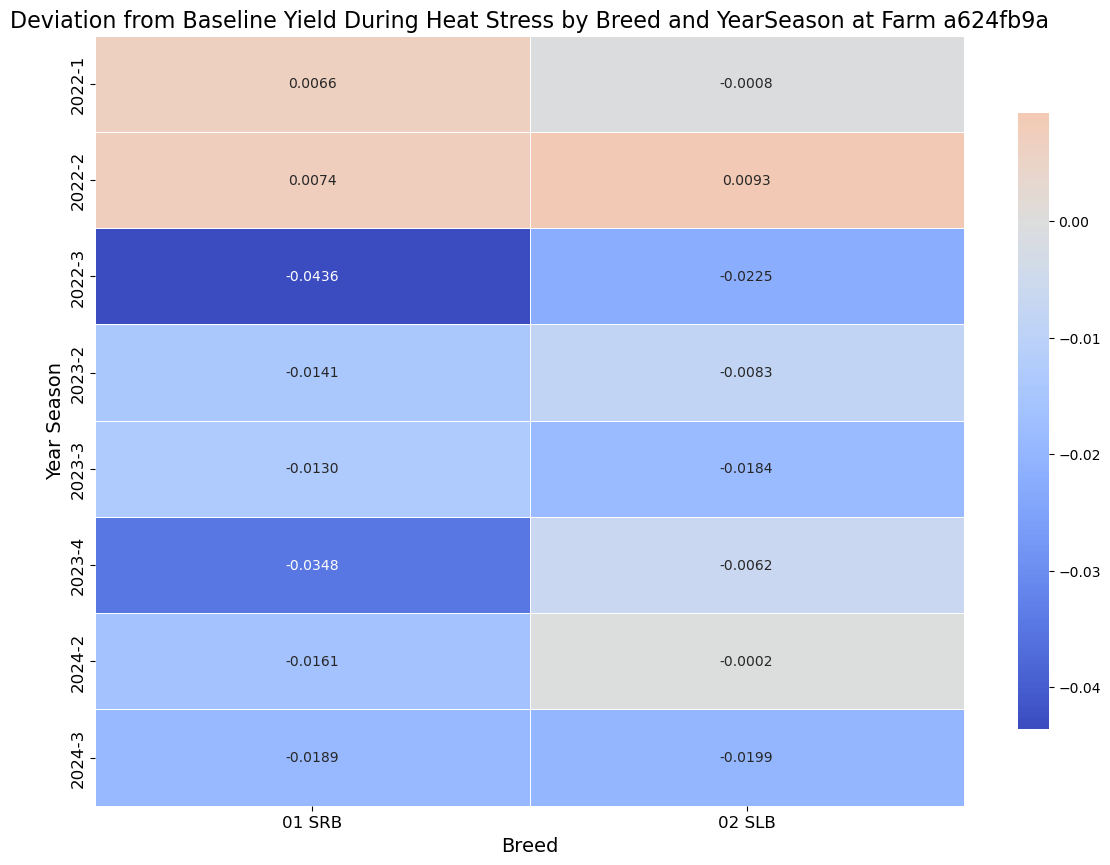

In [26]:
# Pivot data for heatmap
heatmap_data = results_df.pivot_table(index='YearSeason', columns='BreedName', values='Deviation from Baseline HeatStress=1')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed and YearSeason at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Year Season', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

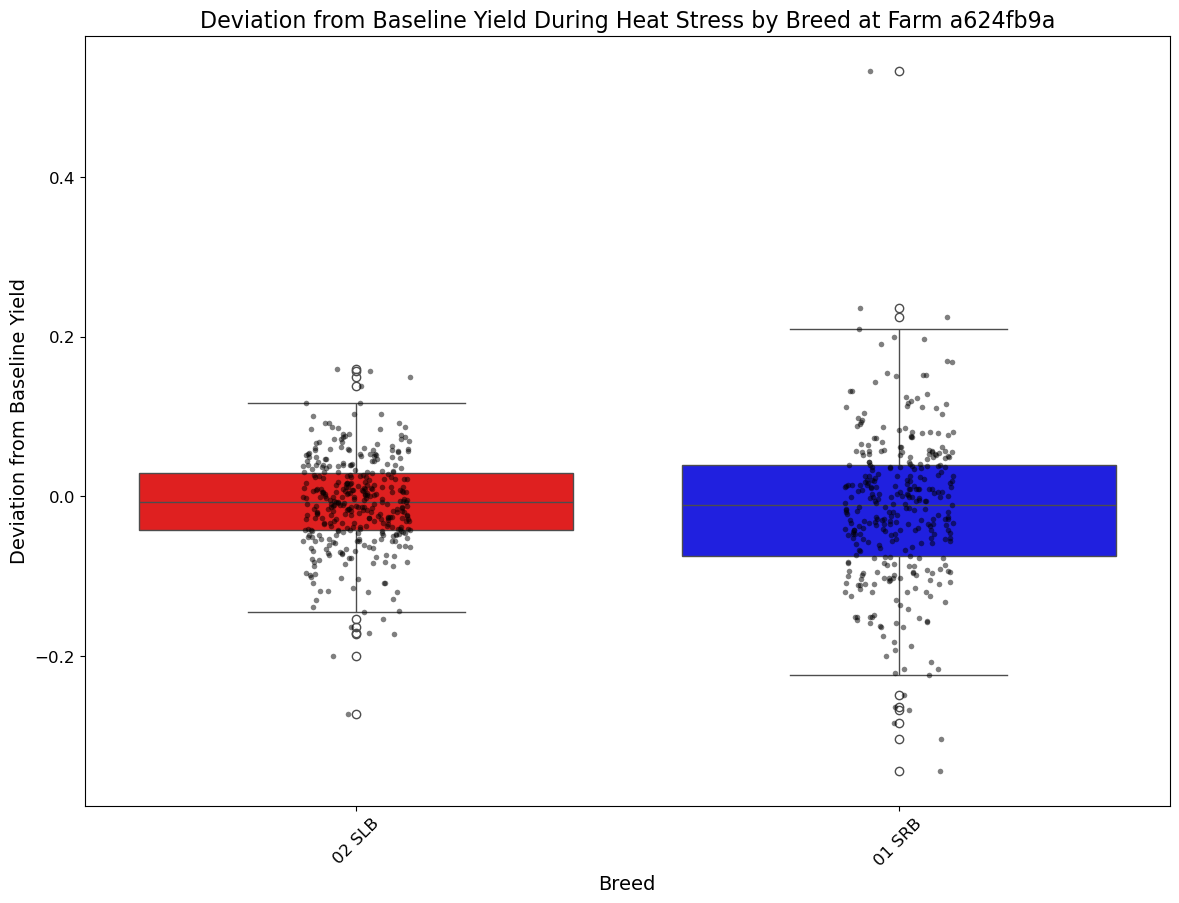

In [27]:
# Define a custom color palette with bright colors
custom_palette = ['#FF0000', '#0000FF']  # Bright red, Bright blue

plt.figure(figsize=(14, 10))
sns.boxplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, hue='BreedName', palette=custom_palette, dodge=False)
sns.stripplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, color='black', size=4, jitter=True, alpha=0.5, dodge=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

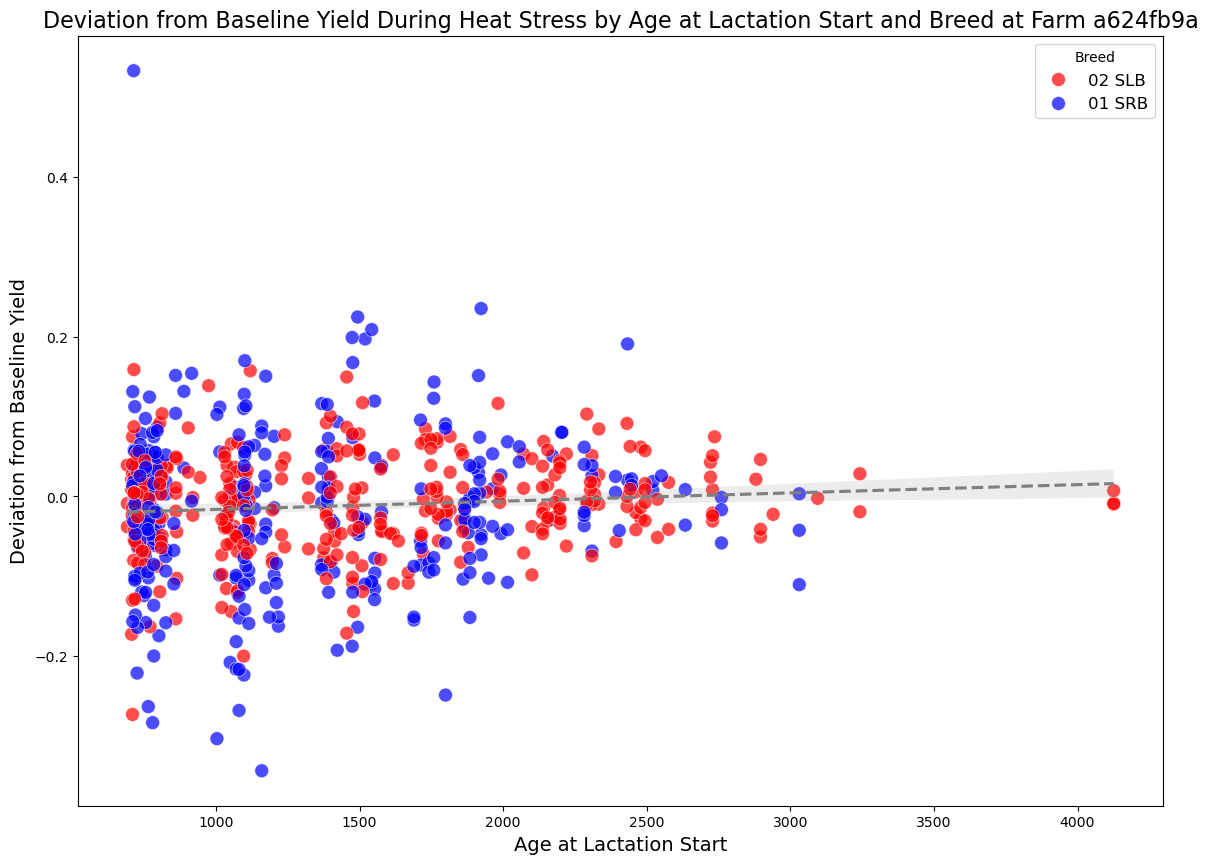

In [28]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, palette=custom_palette, s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
sns.regplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', data=results_df, scatter=False, color='gray', line_kws={"linestyle":"--"})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Age at Lactation Start and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Age at Lactation Start', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.legend(title='Breed', fontsize=12)
plt.show()

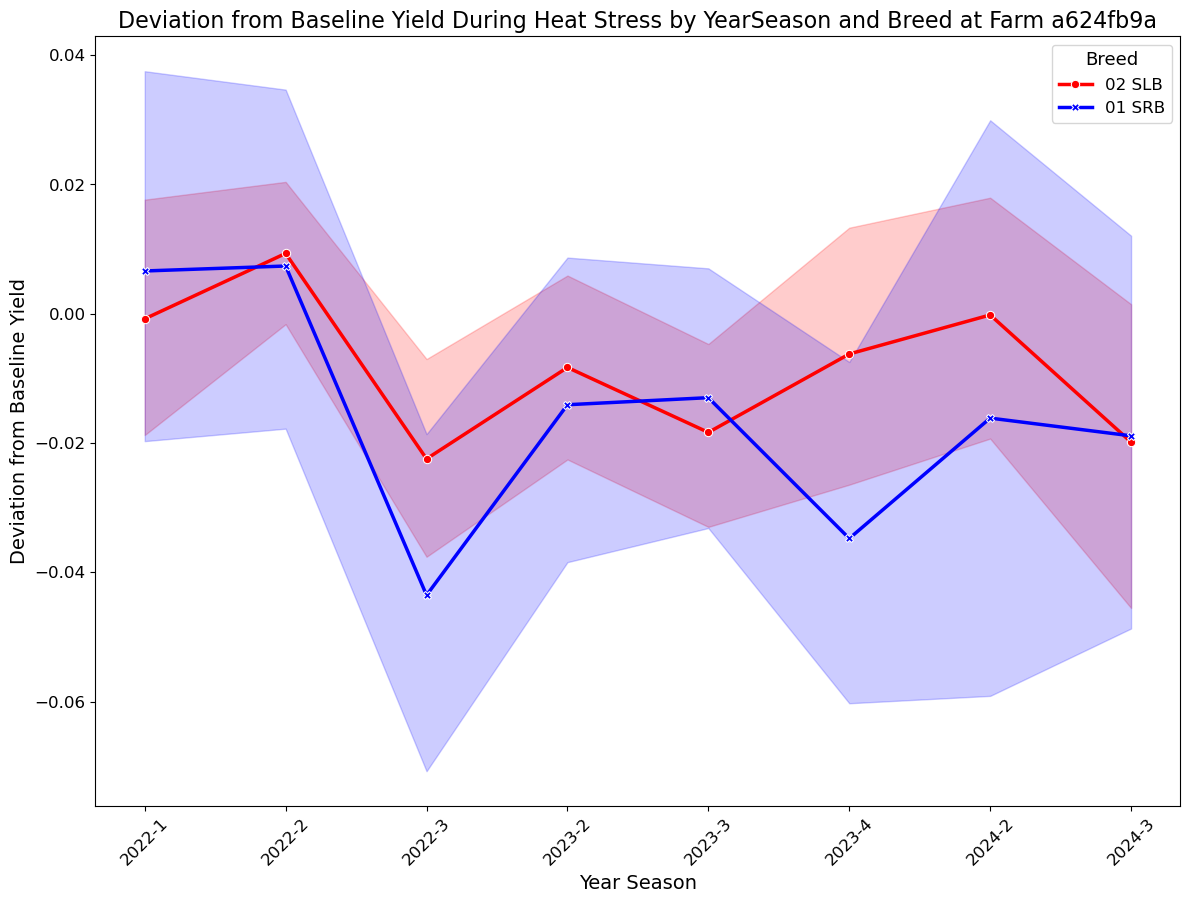

In [29]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='YearSeason', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, marker='o', palette=custom_palette, linewidth=2.5, style='BreedName', markers=True, dashes=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by YearSeason and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Year Season', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breed', fontsize=12, title_fontsize='13')
plt.show()

## Farm 5c06d92d

In [30]:
# Select the farm
farm = '5c06d92d'
daily_farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm].copy()

# Ensure the feature 'MeanTemperature' is float type
daily_farm_data['MeanTemperature'] = daily_farm_data['MeanTemperature'].astype(float)

# Scale features
scaler = StandardScaler()
daily_farm_data[['MeanTemperature', 'Age']] = scaler.fit_transform(daily_farm_data[['MeanTemperature', 'Age']])

# Function to fit model and calculate yield change
def fit_model_and_calculate_yield_change(data, feature, additional_features):
    yield_changes = []
    grouped_data = data.groupby(['YearSeason', 'SE_Number'])
    
    for (year_season, cow), group in grouped_data:
        cow_data = group

        # Prepare features
        X = cow_data[[feature] + additional_features]
        y = cow_data['NormalizedDailyYield']

        # Calculate prior mean and variance
        cow_mean = y.mean()
        cow_variance = y.var() if y.var() > 1e-6 else 1e-6
        beta = 1 / cow_variance
        prior_mean_value = X.mean(axis=0)

        # Define priors
        prior_mean = np.append([cow_mean], prior_mean_value.values).reshape(-1, 1)
        prior_cov = np.eye(len(prior_mean)) * 0.01

        # Fit model
        model = BayesianLinearRegression(
            dataframe=cow_data,
            subject_name=cow,
            selected_features=[feature] + additional_features,
            target='NormalizedDailyYield',
            subject_type='cow',
            prior_mean=prior_mean,
            prior_cov=prior_cov,
            beta=beta
        )
        result = model.fit_model()

        # Store results
        yield_changes.append({
            'YearSeason': year_season,
            'SE_Number': cow,
            'Yield HeatStress': result['Off-set']['mu']
        })

    return pd.DataFrame(yield_changes)

# Define features
selected_feature = 'MeanTemperature'
additional_features = list(encoded_breeds.columns) + ['Age']

# Separate data for HeatStress=1 and HeatStress=0 conditions
data_heatstress_1 = daily_farm_data[daily_farm_data['HeatStress'] == 1]
data_heatstress_0 = daily_farm_data[daily_farm_data['HeatStress'] == 0]

# Fit models and calculate yield changes
yield_changes_heatstress_1 = fit_model_and_calculate_yield_change(data_heatstress_1, selected_feature, additional_features)
yield_changes_heatstress_0 = fit_model_and_calculate_yield_change(data_heatstress_0, selected_feature, additional_features)

# Merge results with breed data and calculate deviations
results_df = yield_changes_heatstress_1.merge(
    yield_changes_heatstress_0, on=['YearSeason', 'SE_Number'], suffixes=('=1', '=0')
)

# Merge age and breed data back to results_df using the AgeAtLactationStart column
# Ensure unique combinations of SE_Number and YearSeason in the daily_farm_data for merging
unique_age_breed_data = daily_farm_data[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName']].drop_duplicates(subset=['SE_Number', 'YearSeason'])

results_df = results_df.merge(
    unique_age_breed_data, on=['SE_Number', 'YearSeason'], how='left'
)

# Calculate the correct deviation from baseline
# baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean() + data_heatstress_1['FarmHeatStressMilkProduction'].mean()
baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean()
results_df['Deviation from Baseline HeatStress=1'] = results_df['Yield HeatStress=1'] - baseline_yield_change  # Corrected calculation

# Reorder columns to make SE_Number the first column
results_df = results_df[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName', 'Yield HeatStress=1', 'Yield HeatStress=0', 'Deviation from Baseline HeatStress=1']]
results_df

,SE_Number,YearSeason,AgeAtLactationStart,BreedName,Yield HeatStress=1,Yield HeatStress=0,Deviation from Baseline HeatStress=1
0,SE-5c06d92d-2055,2022-2,3285,02 SLB,0.986097,1.006855,-0.015038
1,SE-5c06d92d-2058,2022-2,3280,06 RB,0.957334,1.008887,-0.043801
2,SE-5c06d92d-2211,2022-2,2950,02 SLB,0.986595,1.011015,-0.014540
3,SE-5c06d92d-2254,2022-2,2789,02 SLB,0.970745,1.005381,-0.030390
4,SE-5c06d92d-2268,2022-2,2746,02 SLB,0.999430,0.987192,-0.001705
...,...,...,...,...,...,...,...
1867,SE-5c06d92d-3651,2024-3,674,02 SLB,0.968497,0.902573,-0.032637
1868,SE-5c06d92d-3654,2024-3,708,02 SLB,1.003276,0.979341,0.002142
1869,SE-5c06d92d-3660,2024-3,678,01 SRB,0.954820,0.893052,-0.046314
1870,SE-5c06d92d-3661,2024-3,679,02 SLB,0.972969,0.990290,-0.028166


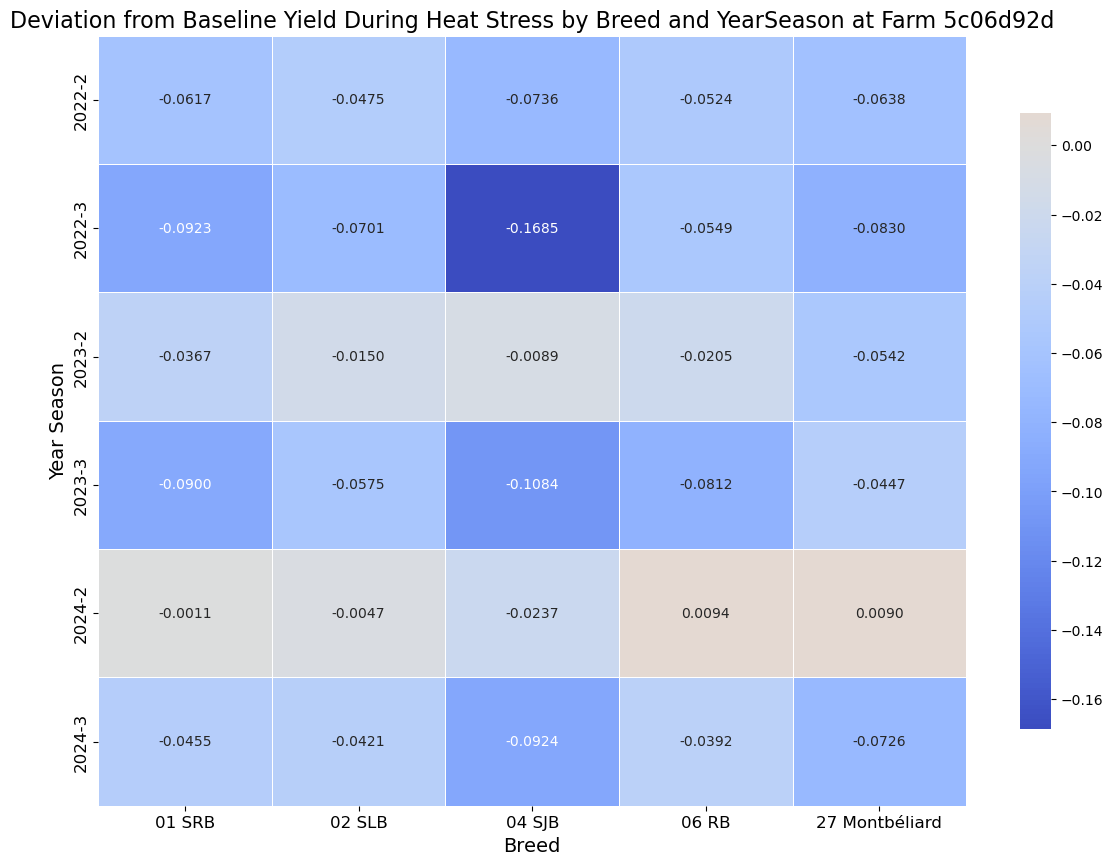

In [31]:
# Pivot data for heatmap
heatmap_data = results_df.pivot_table(index='YearSeason', columns='BreedName', values='Deviation from Baseline HeatStress=1')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed and YearSeason at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Year Season', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

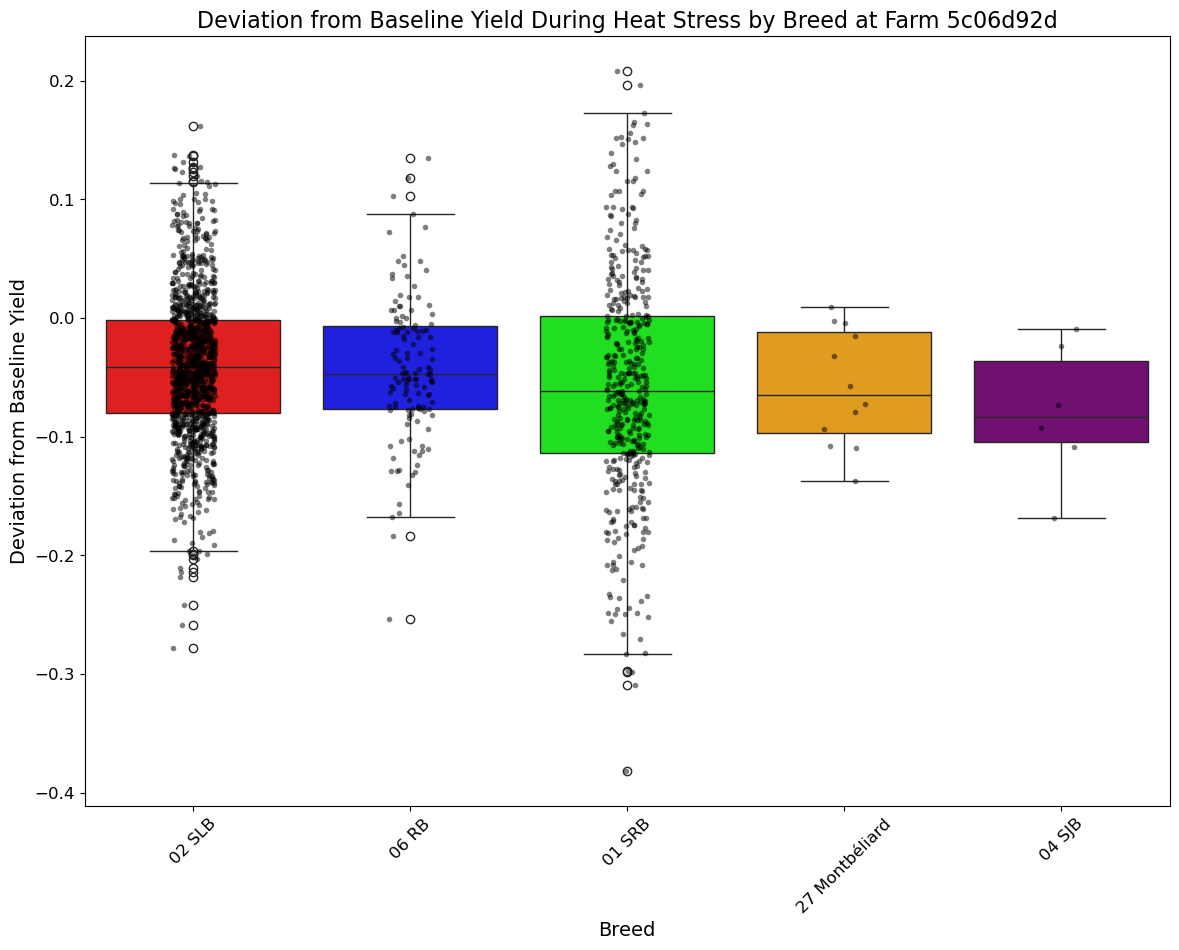

In [32]:
# Define a custom color palette with bright colors
custom_palette = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080']  # Bright red, Bright blue, Bright green, Bright orange, Bright purple

plt.figure(figsize=(14, 10))
sns.boxplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, hue='BreedName', palette=custom_palette, dodge=False)
sns.stripplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, color='black', size=4, jitter=True, alpha=0.5, dodge=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

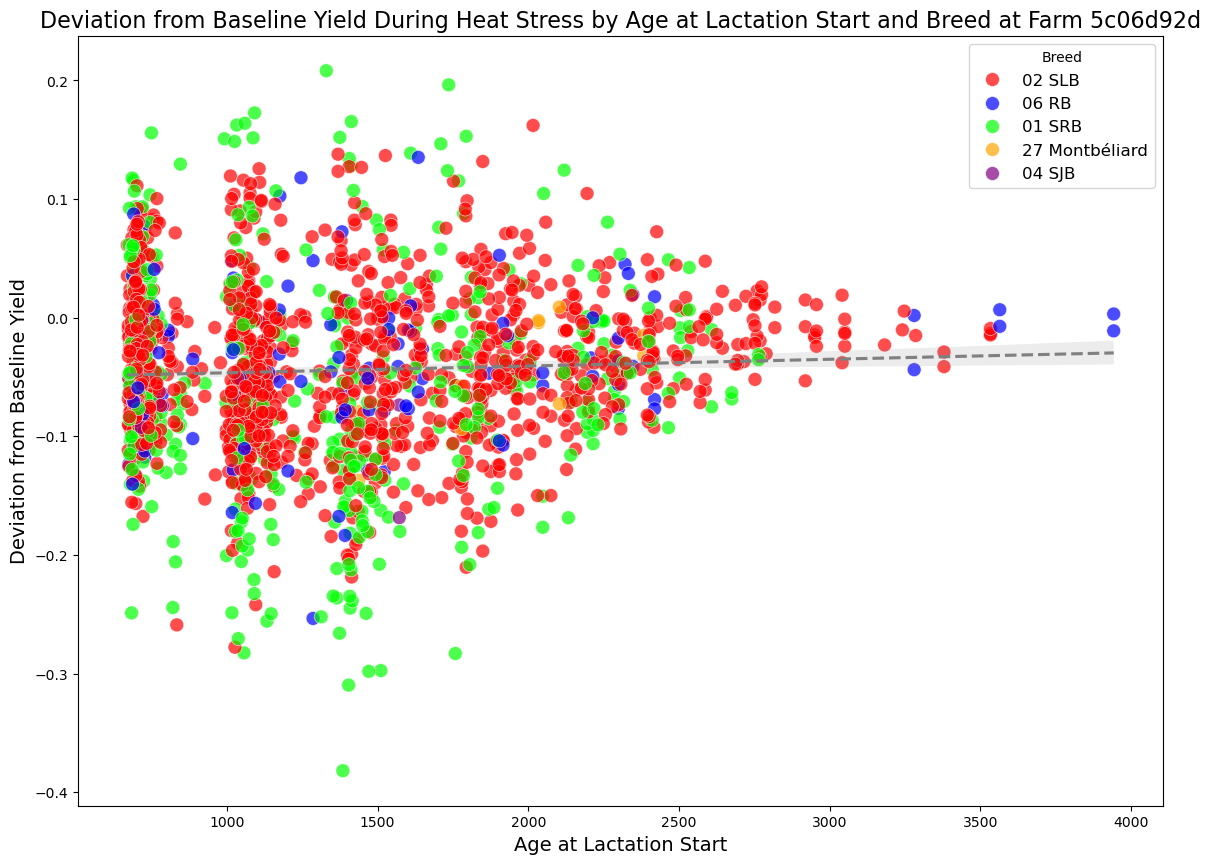

In [33]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, palette=custom_palette, s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
sns.regplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', data=results_df, scatter=False, color='gray', line_kws={"linestyle":"--"})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Age at Lactation Start and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Age at Lactation Start', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.legend(title='Breed', fontsize=12)
plt.show()

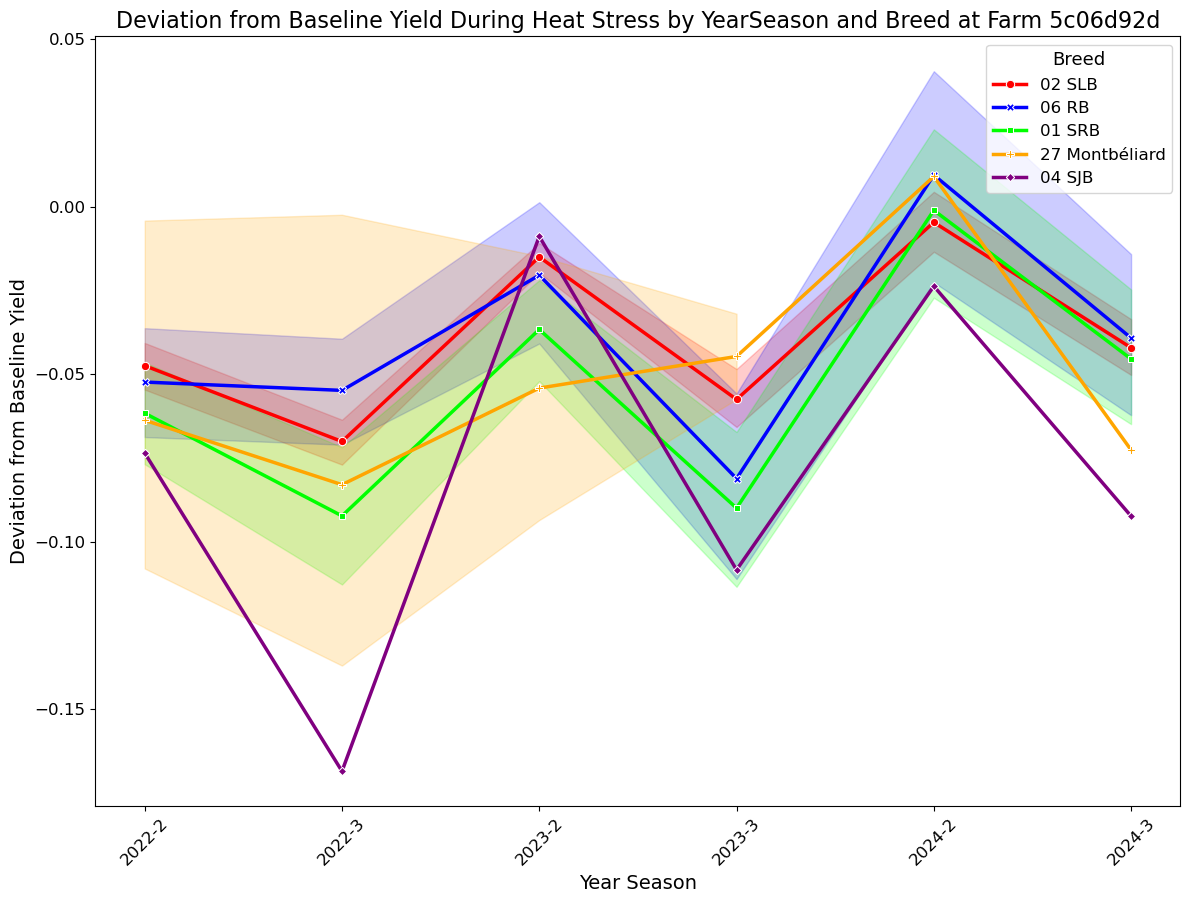

In [34]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='YearSeason', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, marker='o', palette=custom_palette, linewidth=2.5, style='BreedName', markers=True, dashes=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by YearSeason and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Year Season', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breed', fontsize=12, title_fontsize='13')
plt.show()

## Farm 752efd72

In [35]:
# Select the farm
farm = '752efd72'
daily_farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm].copy()

# Ensure the feature 'MeanTemperature' is float type
daily_farm_data['MeanTemperature'] = daily_farm_data['MeanTemperature'].astype(float)

# Scale features
scaler = StandardScaler()
daily_farm_data[['MeanTemperature', 'Age']] = scaler.fit_transform(daily_farm_data[['MeanTemperature', 'Age']])

# Function to fit model and calculate yield change
def fit_model_and_calculate_yield_change(data, feature, additional_features):
    yield_changes = []
    grouped_data = data.groupby(['YearSeason', 'SE_Number'])
    
    for (year_season, cow), group in grouped_data:
        cow_data = group

        # Prepare features
        X = cow_data[[feature] + additional_features]
        y = cow_data['NormalizedDailyYield']

        # Calculate prior mean and variance
        cow_mean = y.mean()
        cow_variance = y.var() if y.var() > 1e-6 else 1e-6
        beta = 1 / cow_variance
        prior_mean_value = X.mean(axis=0)

        # Define priors
        prior_mean = np.append([cow_mean], prior_mean_value.values).reshape(-1, 1)
        prior_cov = np.eye(len(prior_mean)) * 0.01

        # Fit model
        model = BayesianLinearRegression(
            dataframe=cow_data,
            subject_name=cow,
            selected_features=[feature] + additional_features,
            target='NormalizedDailyYield',
            subject_type='cow',
            prior_mean=prior_mean,
            prior_cov=prior_cov,
            beta=beta
        )
        result = model.fit_model()

        # Store results
        yield_changes.append({
            'YearSeason': year_season,
            'SE_Number': cow,
            'Yield HeatStress': result['Off-set']['mu']
        })

    return pd.DataFrame(yield_changes)

# Define features
selected_feature = 'MeanTemperature'
additional_features = list(encoded_breeds.columns) + ['Age']

# Separate data for HeatStress=1 and HeatStress=0 conditions
data_heatstress_1 = daily_farm_data[daily_farm_data['HeatStress'] == 1]
data_heatstress_0 = daily_farm_data[daily_farm_data['HeatStress'] == 0]

# Fit models and calculate yield changes
yield_changes_heatstress_1 = fit_model_and_calculate_yield_change(data_heatstress_1, selected_feature, additional_features)
yield_changes_heatstress_0 = fit_model_and_calculate_yield_change(data_heatstress_0, selected_feature, additional_features)

# Merge results with breed data and calculate deviations
results_df = yield_changes_heatstress_1.merge(
    yield_changes_heatstress_0, on=['YearSeason', 'SE_Number'], suffixes=('=1', '=0')
)

# Merge age and breed data back to results_df using the AgeAtLactationStart column
# Ensure unique combinations of SE_Number and YearSeason in the daily_farm_data for merging
unique_age_breed_data = daily_farm_data[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName']].drop_duplicates(subset=['SE_Number', 'YearSeason'])

results_df = results_df.merge(
    unique_age_breed_data, on=['SE_Number', 'YearSeason'], how='left'
)

# Calculate the correct deviation from baseline
# baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean() + data_heatstress_1['FarmHeatStressMilkProduction'].mean()
baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean()
results_df['Deviation from Baseline HeatStress=1'] = results_df['Yield HeatStress=1'] - baseline_yield_change  # Corrected calculation

# Reorder columns to make SE_Number the first column
results_df = results_df[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName', 'Yield HeatStress=1', 'Yield HeatStress=0', 'Deviation from Baseline HeatStress=1']]
results_df

,SE_Number,YearSeason,AgeAtLactationStart,BreedName,Yield HeatStress=1,Yield HeatStress=0,Deviation from Baseline HeatStress=1
0,SE-752efd72-0001,2022-2,2022,Unknown Breed,1.039843,0.992762,0.038074
1,SE-752efd72-0002,2022-2,1966,02 SLB,1.047583,0.947039,0.045814
2,SE-752efd72-0008,2022-2,1896,02 SLB,1.030098,0.934659,0.028330
3,SE-752efd72-0010,2022-2,1953,02 SLB,1.052771,1.028276,0.051002
4,SE-752efd72-0011,2022-2,1966,02 SLB,1.015938,1.007849,0.014169
...,...,...,...,...,...,...,...
1482,SE-752efd72-0614,2024-3,880,02 SLB,0.939558,0.951407,-0.062210
1483,SE-752efd72-0615,2024-3,882,02 SLB,0.914652,0.974539,-0.087117
1484,SE-752efd72-0619,2024-3,876,02 SLB,1.033651,1.006381,0.031882
1485,SE-752efd72-2747,2024-3,2750,02 SLB,0.989727,1.072098,-0.012042


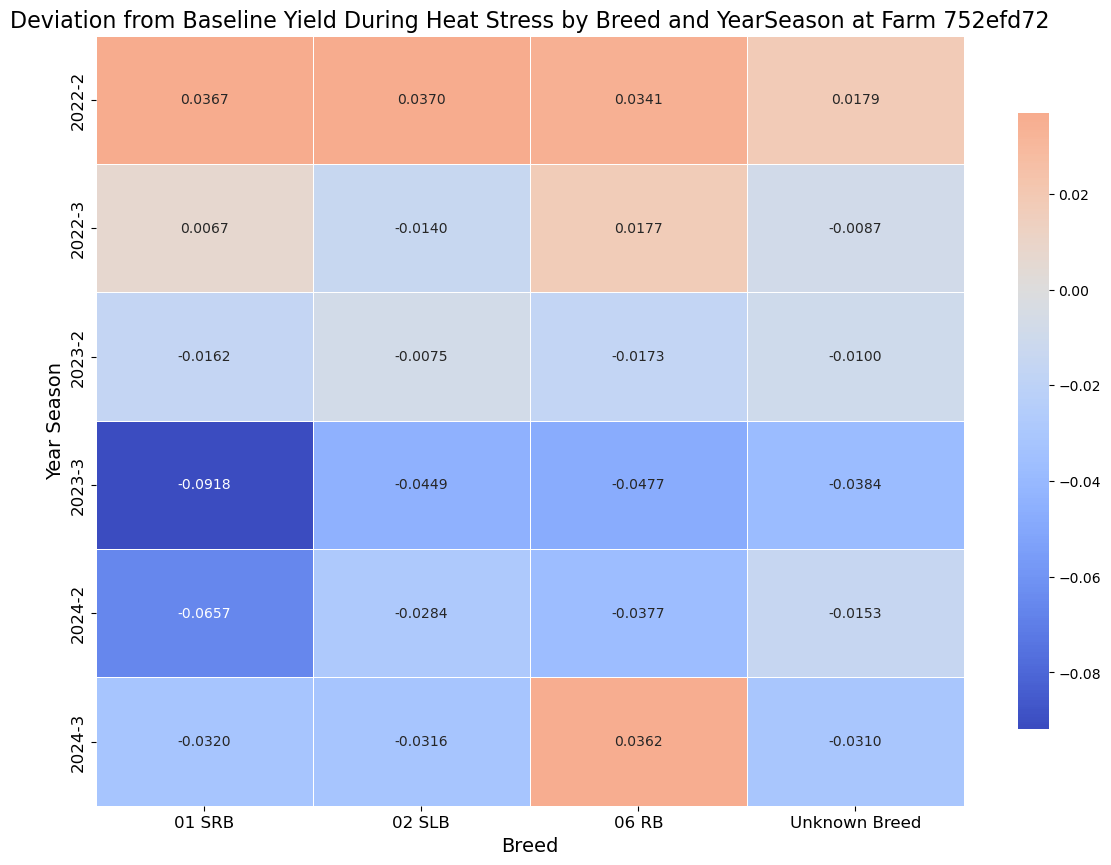

In [36]:
# Pivot data for heatmap
heatmap_data = results_df.pivot_table(index='YearSeason', columns='BreedName', values='Deviation from Baseline HeatStress=1')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed and YearSeason at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Year Season', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

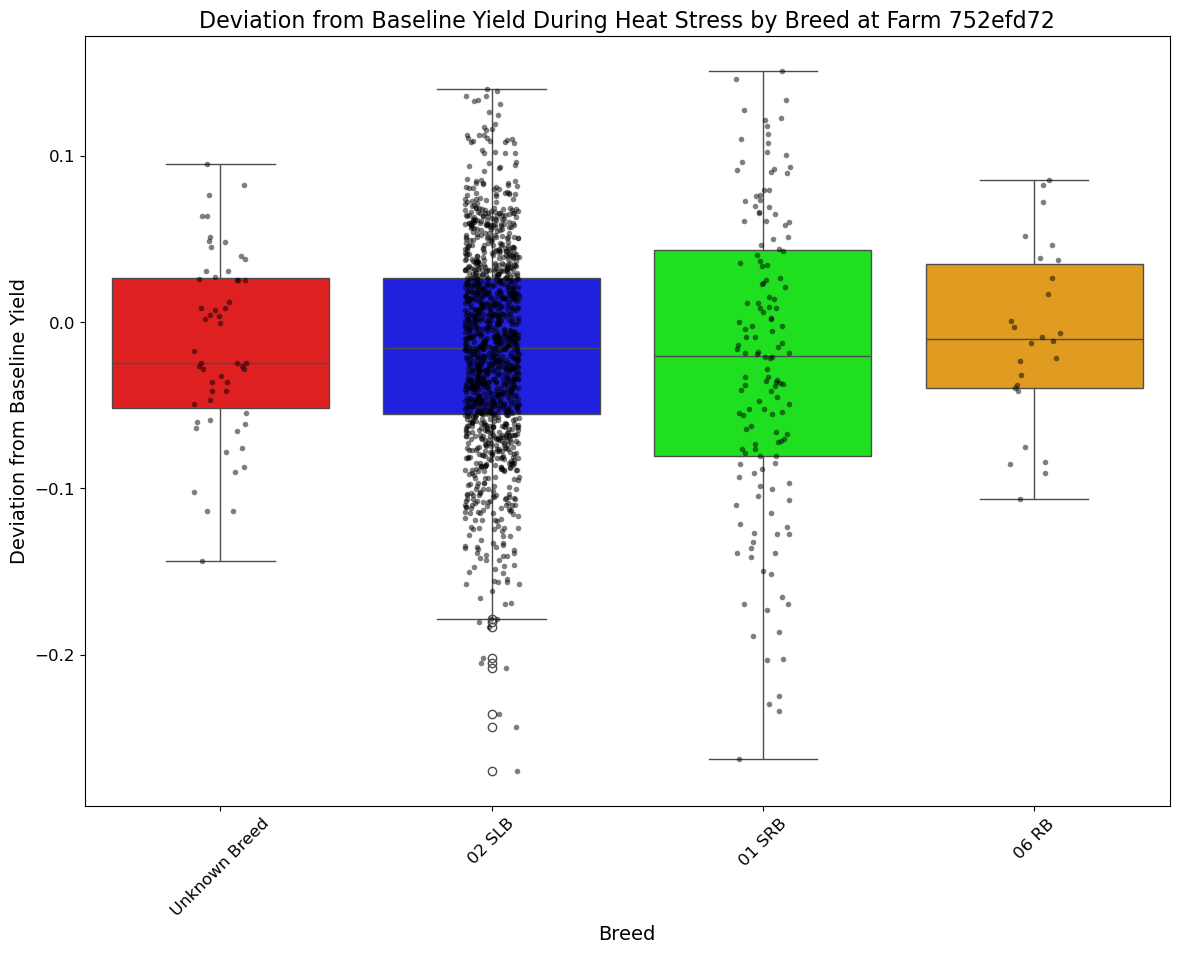

In [37]:
# Define a custom color palette with bright colors
custom_palette = ['#FF0000', '#0000FF', '#00FF00', '#FFA500']  # Bright red, Bright blue, Bright green, Bright orange

plt.figure(figsize=(14, 10))
sns.boxplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, hue='BreedName', palette=custom_palette, dodge=False)
sns.stripplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, color='black', size=4, jitter=True, alpha=0.5, dodge=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

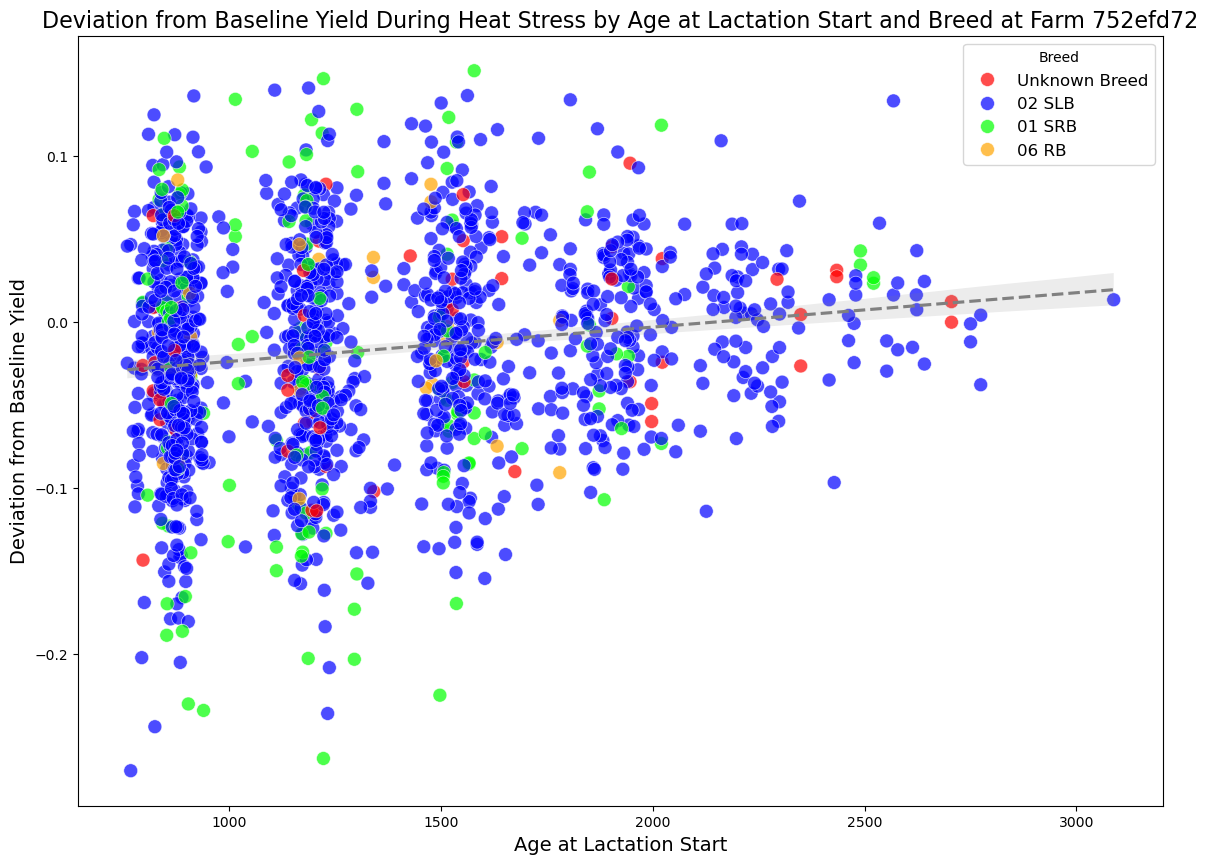

In [38]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, palette=custom_palette, s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
sns.regplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', data=results_df, scatter=False, color='gray', line_kws={"linestyle":"--"})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Age at Lactation Start and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Age at Lactation Start', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.legend(title='Breed', fontsize=12)
plt.show()

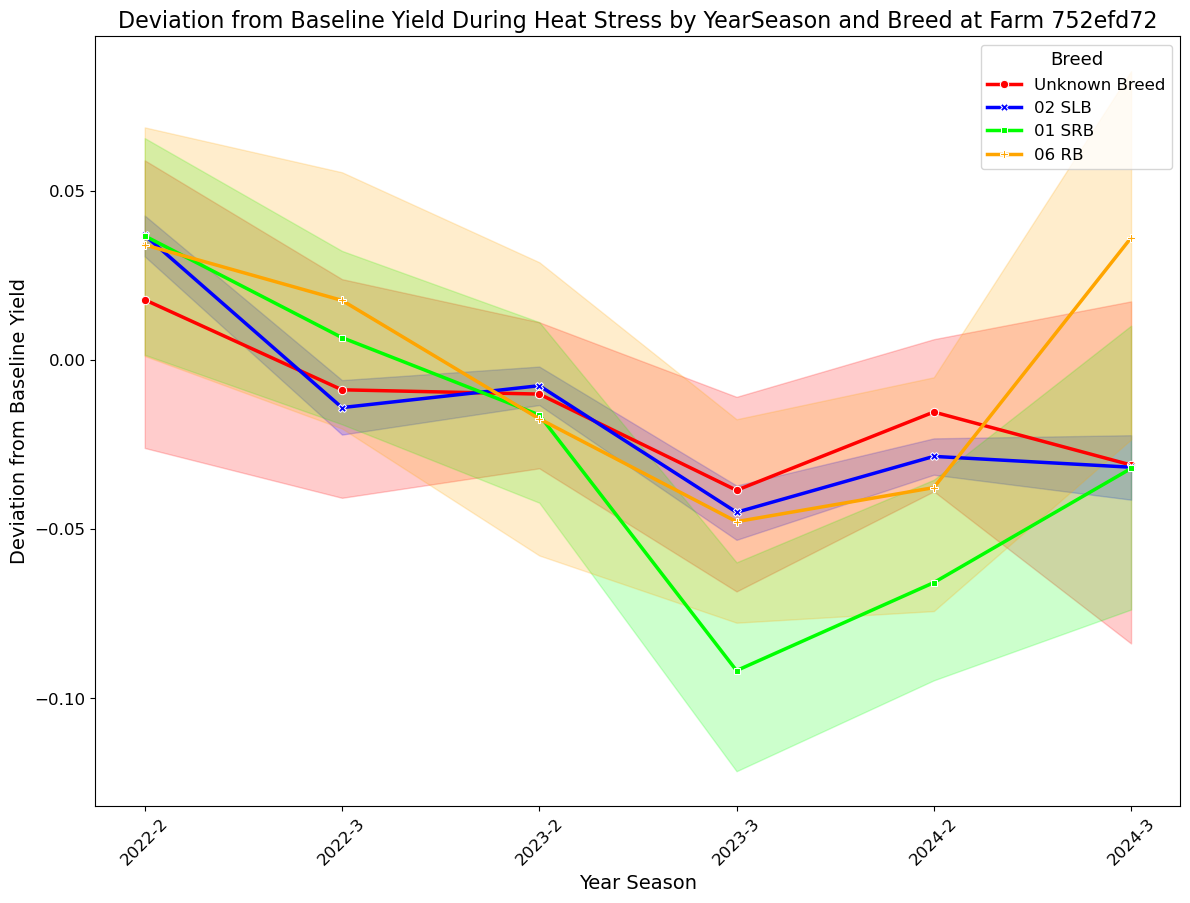

In [39]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='YearSeason', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, marker='o', palette=custom_palette, linewidth=2.5, style='BreedName', markers=True, dashes=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by YearSeason and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Year Season', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breed', fontsize=12, title_fontsize='13')
plt.show()

## Farm f454e660

In [40]:
# Select the farm
farm = 'f454e660'
daily_farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm].copy()

# Ensure the feature 'MeanTemperature' is float type
daily_farm_data['MeanTemperature'] = daily_farm_data['MeanTemperature'].astype(float)

# Scale features
scaler = StandardScaler()
daily_farm_data[['MeanTemperature', 'Age']] = scaler.fit_transform(daily_farm_data[['MeanTemperature', 'Age']])

# Function to fit model and calculate yield change
def fit_model_and_calculate_yield_change(data, feature, additional_features):
    yield_changes = []
    grouped_data = data.groupby(['YearSeason', 'SE_Number'])
    
    for (year_season, cow), group in grouped_data:
        cow_data = group

        # Prepare features
        X = cow_data[[feature] + additional_features]
        y = cow_data['NormalizedDailyYield']

        # Calculate prior mean and variance
        cow_mean = y.mean()
        cow_variance = y.var() if y.var() > 1e-6 else 1e-6
        beta = 1 / cow_variance
        prior_mean_value = X.mean(axis=0)

        # Define priors
        prior_mean = np.append([cow_mean], prior_mean_value.values).reshape(-1, 1)
        prior_cov = np.eye(len(prior_mean)) * 0.01

        # Fit model
        model = BayesianLinearRegression(
            dataframe=cow_data,
            subject_name=cow,
            selected_features=[feature] + additional_features,
            target='NormalizedDailyYield',
            subject_type='cow',
            prior_mean=prior_mean,
            prior_cov=prior_cov,
            beta=beta
        )
        result = model.fit_model()

        # Store results
        yield_changes.append({
            'YearSeason': year_season,
            'SE_Number': cow,
            'Yield HeatStress': result['Off-set']['mu']
        })

    return pd.DataFrame(yield_changes)

# Define features
selected_feature = 'MeanTemperature'
additional_features = list(encoded_breeds.columns) + ['Age']

# Separate data for HeatStress=1 and HeatStress=0 conditions
data_heatstress_1 = daily_farm_data[daily_farm_data['HeatStress'] == 1]
data_heatstress_0 = daily_farm_data[daily_farm_data['HeatStress'] == 0]

# Fit models and calculate yield changes
yield_changes_heatstress_1 = fit_model_and_calculate_yield_change(data_heatstress_1, selected_feature, additional_features)
yield_changes_heatstress_0 = fit_model_and_calculate_yield_change(data_heatstress_0, selected_feature, additional_features)

# Merge results with breed data and calculate deviations
results_df = yield_changes_heatstress_1.merge(
    yield_changes_heatstress_0, on=['YearSeason', 'SE_Number'], suffixes=('=1', '=0')
)

# Merge age and breed data back to results_df using the AgeAtLactationStart column
# Ensure unique combinations of SE_Number and YearSeason in the daily_farm_data for merging
unique_age_breed_data = daily_farm_data[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName']].drop_duplicates(subset=['SE_Number', 'YearSeason'])

results_df = results_df.merge(
    unique_age_breed_data, on=['SE_Number', 'YearSeason'], how='left'
)

# Calculate the correct deviation from baseline
# baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean() + data_heatstress_1['FarmHeatStressMilkProduction'].mean()
baseline_yield_change = daily_farm_data['NormalizedDailyYield'].mean()
results_df['Deviation from Baseline HeatStress=1'] = results_df['Yield HeatStress=1'] - baseline_yield_change  # Corrected calculation

# Reorder columns to make SE_Number the first column
results_df = results_df[['SE_Number', 'YearSeason', 'AgeAtLactationStart', 'BreedName', 'Yield HeatStress=1', 'Yield HeatStress=0', 'Deviation from Baseline HeatStress=1']]
results_df

,SE_Number,YearSeason,AgeAtLactationStart,BreedName,Yield HeatStress=1,Yield HeatStress=0,Deviation from Baseline HeatStress=1
0,SE-a2bab923-5680-5,2022-2,4202,04 SJB,0.982262,0.973392,-0.018668
1,SE-f454e660-1625,2022-2,2394,04 SJB,0.946731,1.029088,-0.054199
2,SE-f454e660-231,2022-2,2402,02 SLB,0.946131,1.001139,-0.054799
3,SE-f454e660-263,2022-2,2358,02 SLB,0.969213,0.976056,-0.031717
4,SE-f454e660-268,2022-2,2268,01 SRB,0.955778,1.010074,-0.045152
...,...,...,...,...,...,...,...
864,SE-f454e660-789,2024-3,759,02 SLB,1.032108,1.038692,0.031178
865,SE-f454e660-796,2024-3,618,02 SLB,1.052780,1.054411,0.051850
866,SE-f454e660-799,2024-3,651,02 SLB,1.123548,1.092723,0.122618
867,SE-f454e660-804,2024-3,662,02 SLB,0.979491,1.077785,-0.021439


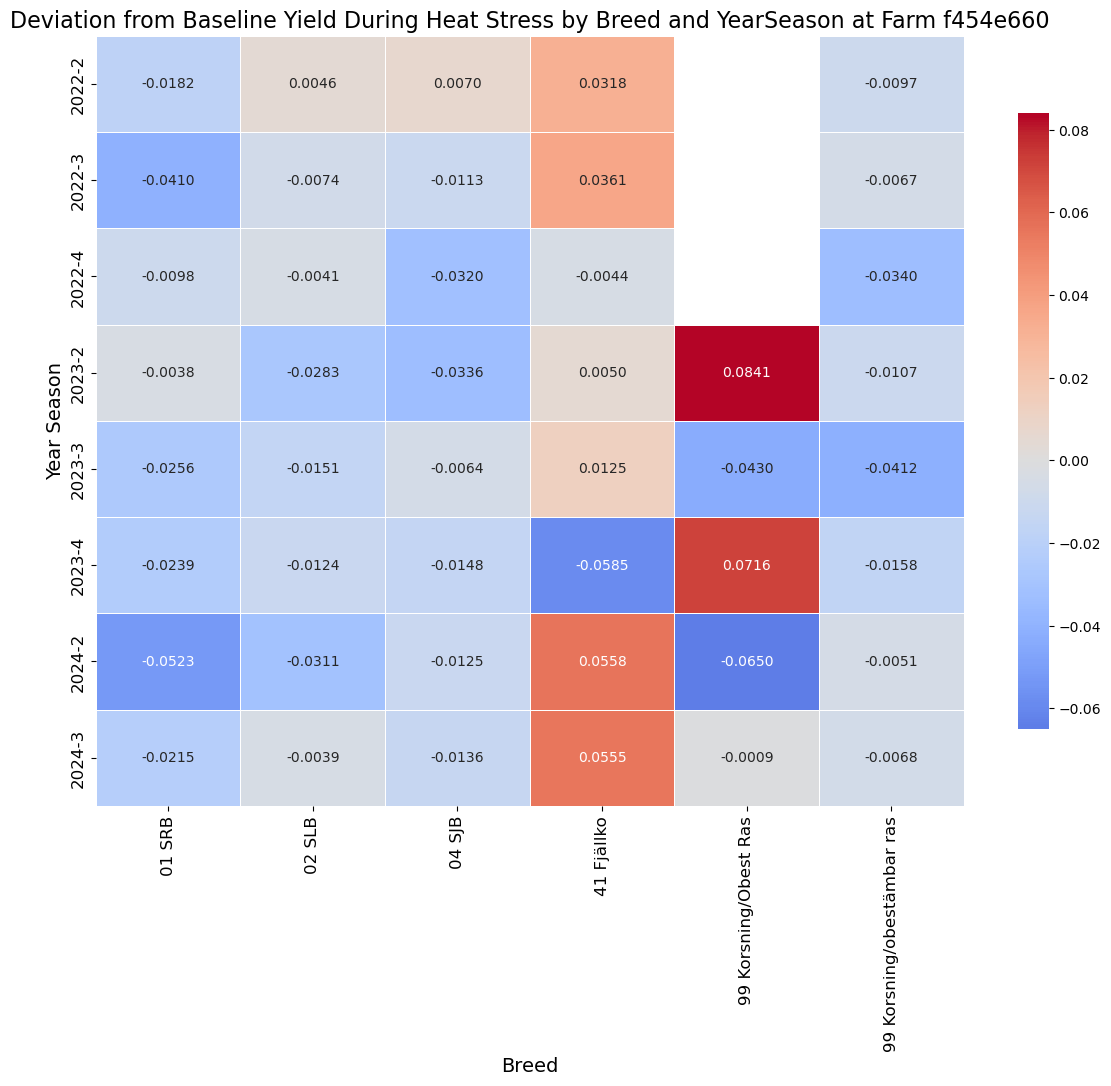

In [41]:
# Pivot data for heatmap
heatmap_data = results_df.pivot_table(index='YearSeason', columns='BreedName', values='Deviation from Baseline HeatStress=1')

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, fmt=".4f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed and YearSeason at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Year Season', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

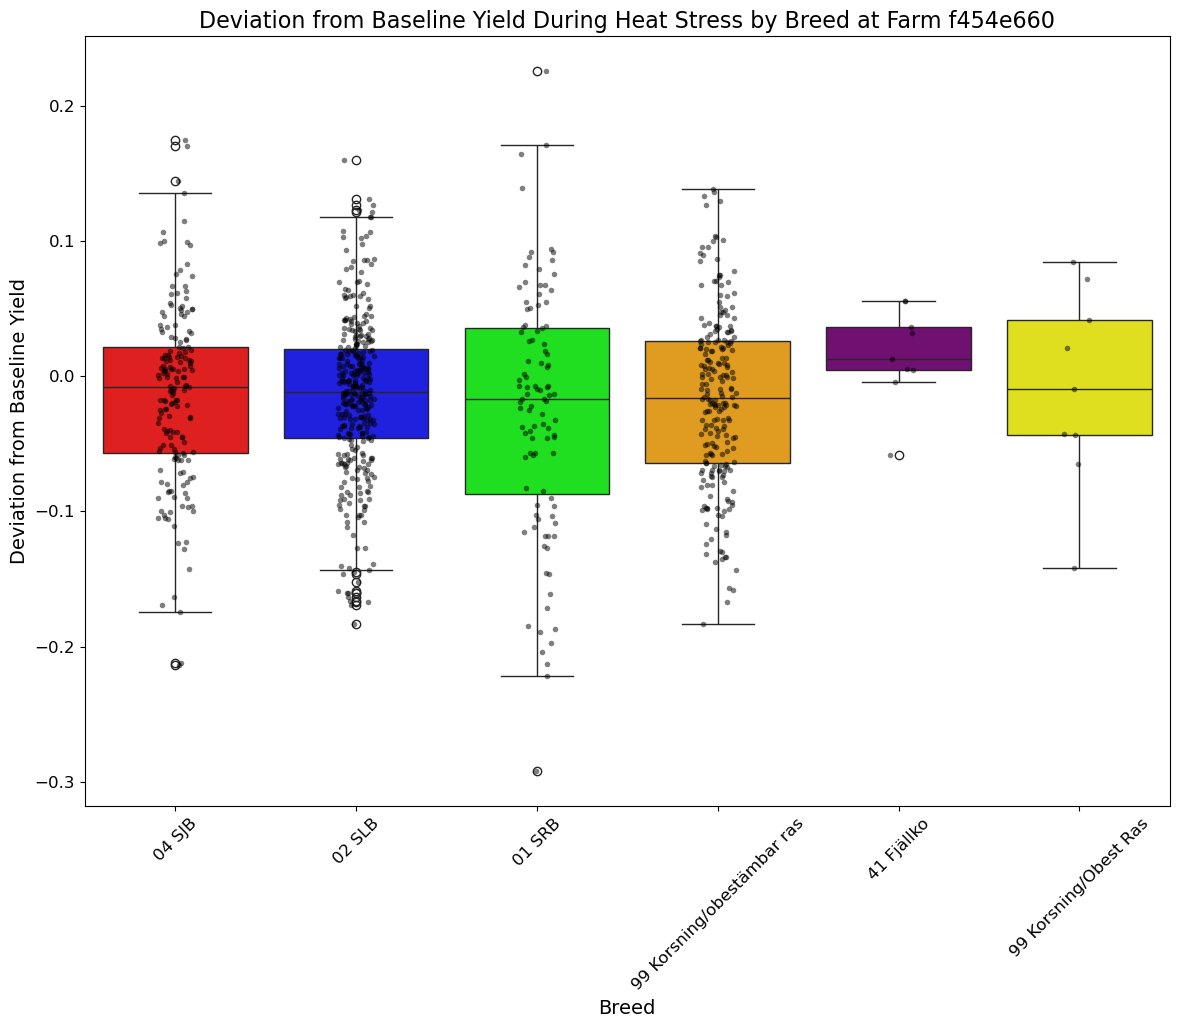

In [42]:
# Define a custom color palette with bright colors
custom_palette = ['#FF0000', '#0000FF', '#00FF00', '#FFA500', '#800080', '#FFFF00']  # Bright red, Bright blue, Bright green, Bright orange, Bright purple, Bright yellow

plt.figure(figsize=(14, 10))
sns.boxplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, hue='BreedName', palette=custom_palette, dodge=False)
sns.stripplot(x='BreedName', y='Deviation from Baseline HeatStress=1', data=results_df, color='black', size=4, jitter=True, alpha=0.5, dodge=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by Breed at Farm {farm}', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

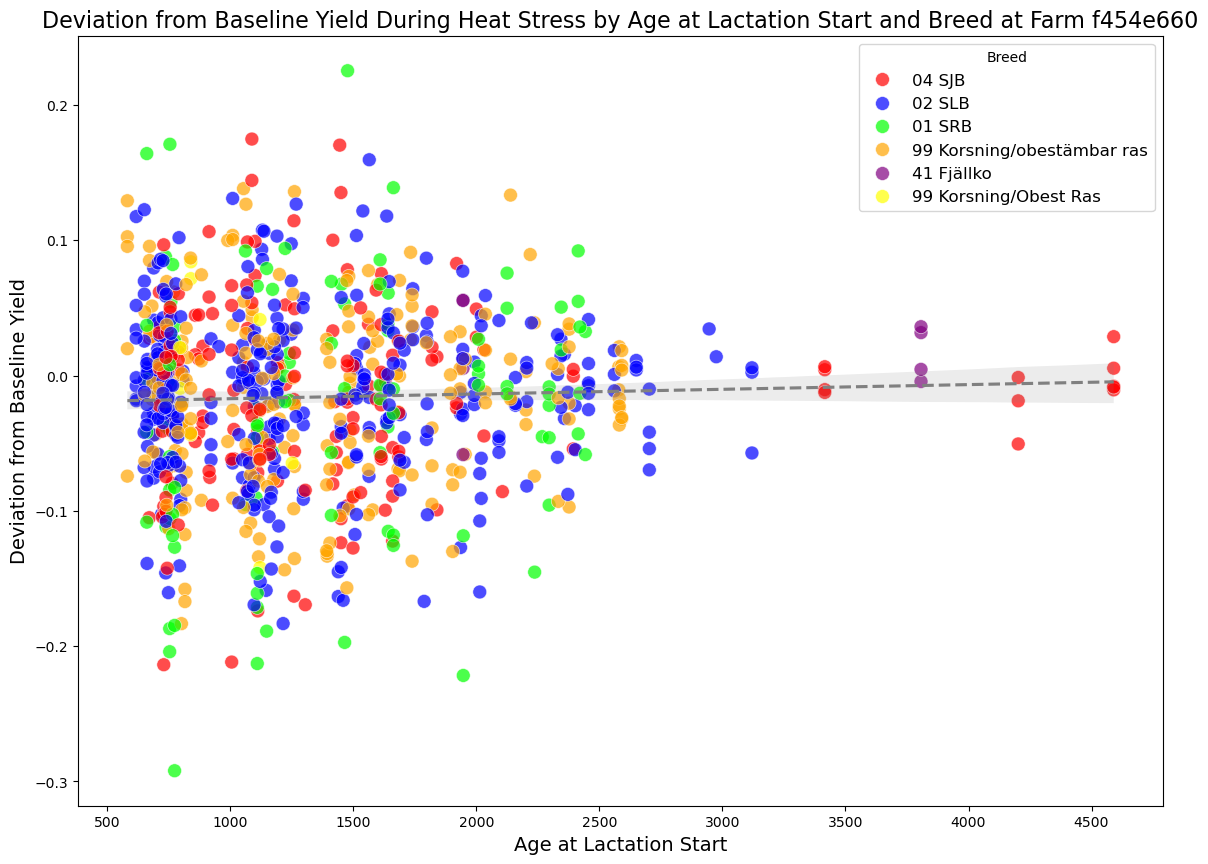

In [43]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, palette=custom_palette, s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
sns.regplot(x='AgeAtLactationStart', y='Deviation from Baseline HeatStress=1', data=results_df, scatter=False, color='gray', line_kws={"linestyle":"--"})
plt.title(f'Deviation from Baseline Yield During Heat Stress by Age at Lactation Start and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Age at Lactation Start', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.legend(title='Breed', fontsize=12)
plt.show()

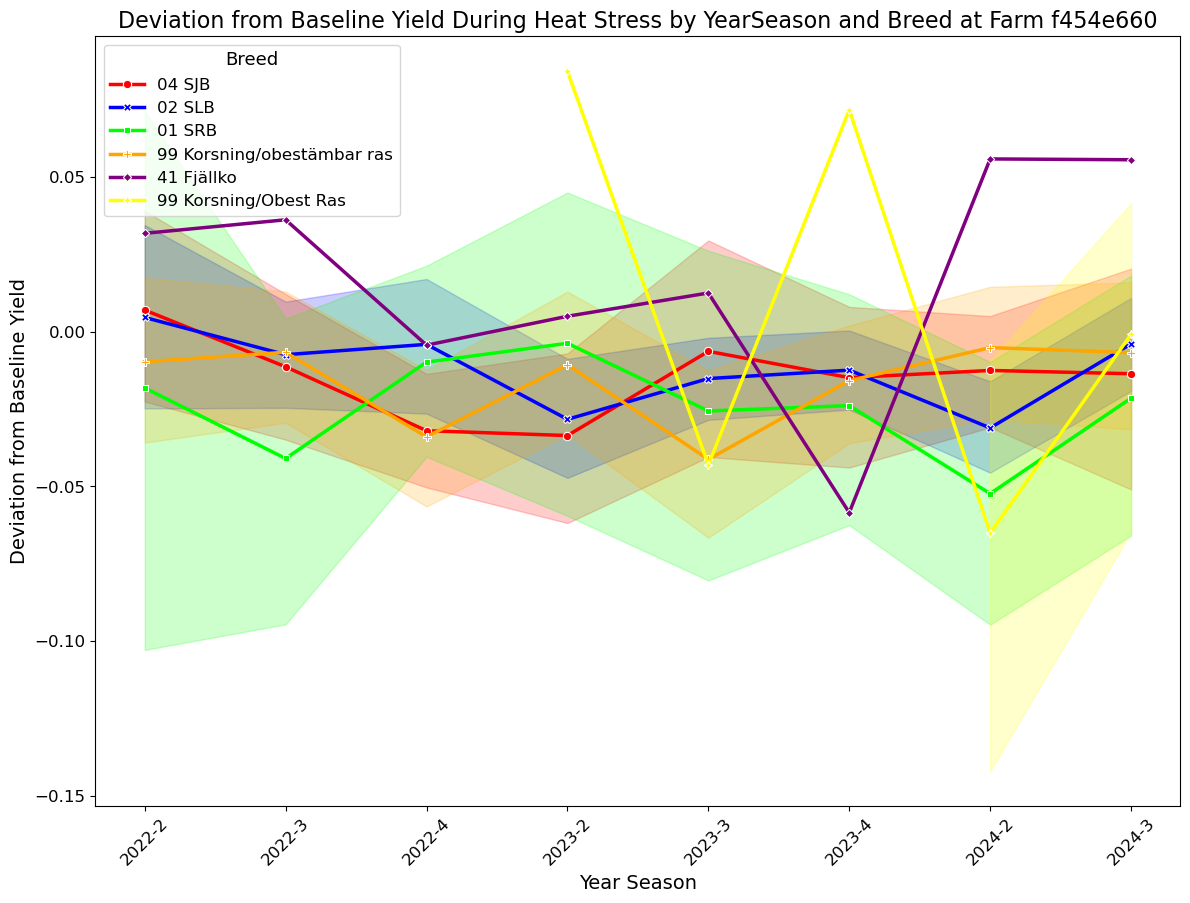

In [44]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='YearSeason', y='Deviation from Baseline HeatStress=1', hue='BreedName', data=results_df, marker='o', palette=custom_palette, linewidth=2.5, style='BreedName', markers=True, dashes=False)
plt.title(f'Deviation from Baseline Yield During Heat Stress by YearSeason and Breed at Farm {farm}', fontsize=16)
plt.xlabel('Year Season', fontsize=14)
plt.ylabel('Deviation from Baseline Yield', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breed', fontsize=12, title_fontsize='13')
plt.show()